# 01 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

# 02 Importing Dataframe

In [2]:
# Importing dataframe
path = r'C:\Users\vacgo\Documents\Achievement 6'
nc = pd.read_pickle(os.path.join(path, '02 Data', 'Cleaned Data', 'neighborhood_crime.pkl'))

In [5]:
nc.head()

,key,neighborhood,district,year,crimes_total,robbery,street_handbag_robbery,physical_injuries_total,dangerous_serious_bodily_harm,dep_of_liberty_coercion_threats_stalking,...,theft_of_motor_vehicles,theft_parts_motor_vehicles,bike_theft,res_burglarly,arson_offense_total,arson,prop_damage_total,prop_damage_graffiti,drugs,neighborhood_offence
1,11001,Tiergarten Sued,Mitte,2013,36863,557,366,3522,1106,801,...,99,2501,984,473,99,30,1677,152,732,6511
2,11002,Regierungsviertel,Mitte,2013,75823,472,204,5213,1384,1330,...,193,3014,2349,354,43,11,3701,1620,622,8903
3,11003,Alexanderplatz,Mitte,2013,36892,382,228,2773,724,631,...,160,1378,1673,583,81,35,2416,888,1007,5739
4,11004,Brunnenstrasse Sued,Mitte,2013,16464,120,34,812,184,237,...,372,861,1294,515,23,11,1429,632,259,3618
5,12005,Moabit West,Mitte,2013,15223,205,98,1349,357,541,...,166,980,766,324,103,28,1169,208,460,3030


# 03 Data Cleaning

In [7]:
nc.columns

Index(['key', 'neighborhood', 'district', 'year', 'crimes_total', 'robbery',
       'street_handbag_robbery', 'physical_injuries_total',
       'dangerous_serious_bodily_harm',
       'dep_of_liberty_coercion_threats_stalking', 'theft_total',
       'theft_of_motor_vehicles', 'theft_parts_motor_vehicles', 'bike_theft',
       'res_burglarly', 'arson_offense_total', 'arson', 'prop_damage_total',
       'prop_damage_graffiti', 'drugs', 'neighborhood_offence'],
      dtype='object')

In [17]:
#Drop unnecessary columns
nc1 = nc.drop(columns=['key', 'neighborhood', 'district', 'year', 'crimes_total', 'robbery','street_handbag_robbery', 
                       'dangerous_serious_bodily_harm','dep_of_liberty_coercion_threats_stalking', 'theft_total', 
                       'theft_of_motor_vehicles', 'theft_parts_motor_vehicles', 'bike_theft', 'res_burglarly', 
                       'arson_offense_total', 'arson', 'prop_damage_total','prop_damage_graffiti'])

In [19]:
nc1.head()

,physical_injuries_total,drugs,neighborhood_offence
1,3522,732,6511
2,5213,622,8903
3,2773,1007,5739
4,812,259,3618
5,1349,460,3030


In [21]:
nc1 = nc1.rename(columns={'physical_injuries_total': 'Assault', 'drugs': 'Drug Use', 'neighborhood_offence': 'Neighborhood Offence'})

In [23]:
nc1.head()

,Assault,Drug Use,Neighborhood Offence
1,3522,732,6511
2,5213,622,8903
3,2773,1007,5739
4,812,259,3618
5,1349,460,3030


# 04 Elbow

In [38]:
os.environ["OMP_NUM_THREADS"] = "6"  # You can adjust the number as needed

In [70]:
num_cl = range(1, 15) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [72]:
score = [kmeans[i].fit(nc1).score(nc1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\vacgo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\vacgo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\vacgo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\vacgo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

[-3197164376.7604165,
 -1551074579.763577,
 -924862534.9202999,
 -697043125.0153507,
 -539650956.8507825,
 -430525399.7054325,
 -359528620.5119349,
 -315887909.745201,
 -264786824.51251107,
 -236527265.3251895,
 -207690879.84189993,
 -191888140.1583929,
 -181335178.4048098,
 -173241762.48293504]

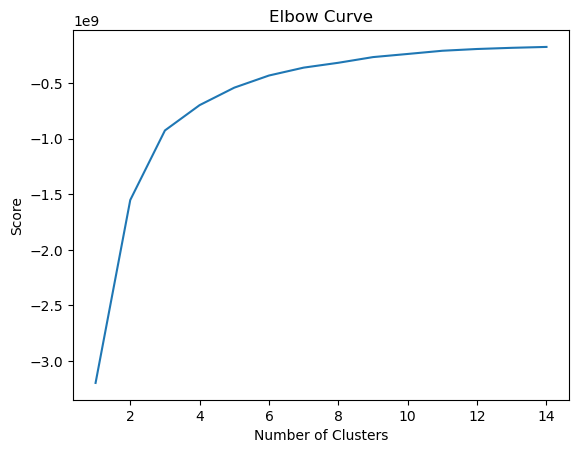

In [74]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### The elbow in this curve is not as defined as the one in the exercise. However, there is little change to the slope after 4 cluster and the curve begins to smoothen out in from this point.

# 05 K-Means Clustering

In [80]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [82]:
# Fit the k-means object to the data.

kmeans.fit(nc1)

C:\Users\vacgo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=4)

In [84]:
nc1['clusters'] = kmeans.fit_predict(nc1)

C:\Users\vacgo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [86]:
nc1.head()

,Assault,Drug Use,Neighborhood Offence,clusters
1,3522,732,6511,1
2,5213,622,8903,1
3,2773,1007,5739,1
4,812,259,3618,3
5,1349,460,3030,0


In [88]:
nc1['clusters'].value_counts()

clusters
0    611
2    506
3    261
1     62
Name: count, dtype: int64

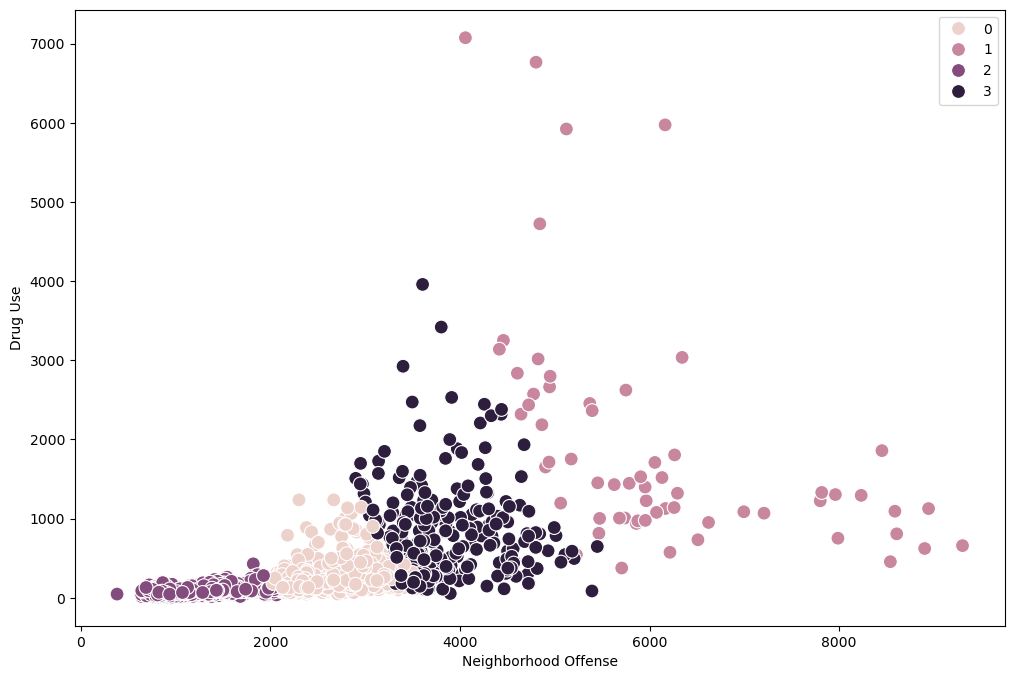

In [90]:
# Plot the clusters for the "Neighborhood Offence" and "Drug Use" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=nc1['Neighborhood Offence'], y=nc1['Drug Use'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Neighborhood Offense') # Label x-axis.
plt.ylabel('Drug Use') # Label y-axis.
plt.show()

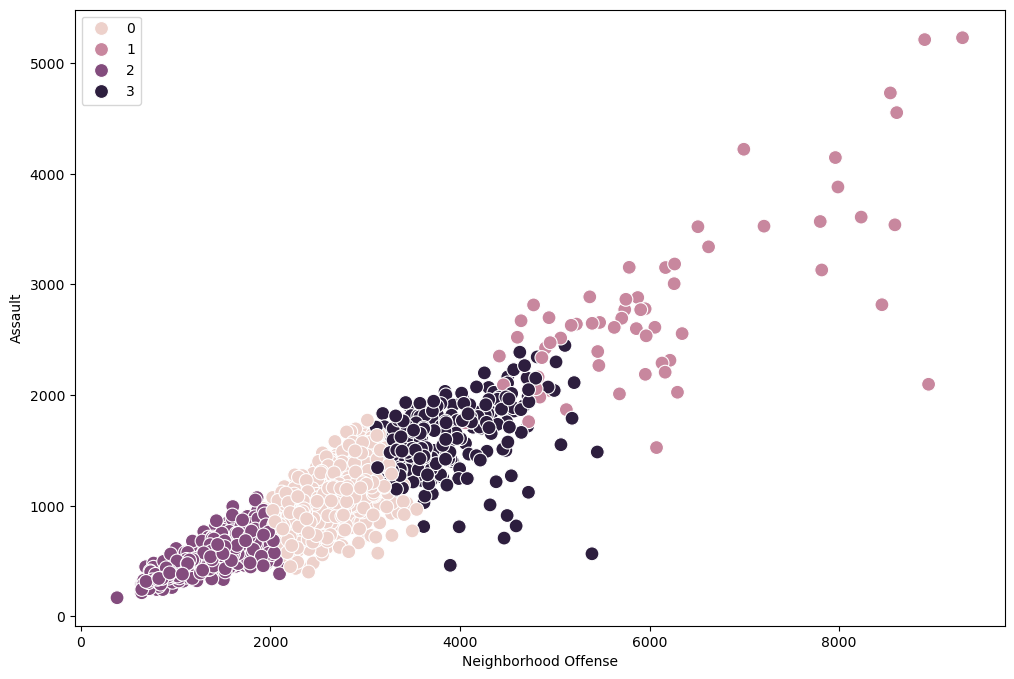

In [92]:
# Plot the clusters for the "Neighborhood Offence" and "Assault" variables.

plt.figure(figsize=(12,8))
ax2 = sns.scatterplot(x=nc1['Neighborhood Offence'], y=nc1['Assault'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax2.grid(False) # This removes the grid from the background.
plt.xlabel('Neighborhood Offense') # Label x-axis.
plt.ylabel('Assault') # Label y-axis.
plt.show()

In [98]:
nc1.loc[nc1['clusters'] == 2, 'cluster'] = 'purple'
nc1.loc[nc1['clusters'] == 1, 'cluster'] = 'pink'
nc1.loc[nc1['clusters'] == 0, 'cluster'] = 'beige'
nc1.loc[nc1['clusters'] == 3, 'cluster'] = 'dark purle'

In [100]:
nc1.groupby('cluster').agg({'Neighborhood Offence':['mean', 'median'], 
                         'Drug Use':['mean', 'median'], 
                         'Assault':['mean', 'median']})

Neighborhood Offence             Drug Use              Assault  \
                           mean  median         mean  median         mean   
cluster                                                                     
beige               2608.680851  2597.0   260.433715   217.0  1059.165303   
dark purle          3832.731801  3699.0   797.130268   647.0  1591.793103   
pink                6109.306452  5868.5  1890.274194  1364.0  2815.225806   
purple              1397.660079  1420.0   103.173913   100.0   560.071146   

                    
            median  
cluster             
beige       1039.0  
dark purle  1595.0  
pink        2645.5  
purple       546.0

### Observations from the two graphs:

#### Neighborhood Offense vs Drugs
Purple - means low neighborhood offense, low drug use

Beige - low to moderate neighborhood offense, low drug use

Dark Purple - moderate to high neighborhood offense, moderate drug use

Pink - high neighborhood offense, high drug use

#### Neighborhood Offense vs Assault
Purple - low neighborhood offense, low drug use

Beige - low to moderate neighborhood offense, low to moderate drug use

Dark Purple - moderate to high neighborhood offense, moderate to high drug use

Pink - high neighborhood offense, high drug use




#### Looking at the statstical description, we can see that pink is consistent in showing the highest mean and median in all three categories. Purple on the other hand, shows the least mean and median. Beige and Dark purple clusters are in between these two.

### The clustering seems to align well with the expexted patterns. In both the graph and the descriptive statistics, the pink cluster shows that the higher the neighborhood offense is, the higher both the assault and drug use.

### Next steps:

Apply a time series analysis for each neighborhood to see how each of these crimes have changed over time.

Are these applicable to all neighborhoods or districts or only affects certain districts or neighborhood? Is it because of socio-economic factors that affect the crime rate?

What programmes does the local or district government do to address these?